# CS 331 - PA1: Linear Regression and Polynomial Regression (40+80)

**Member 1**

Name:M Umar Zubair

Roll Number:26100355

**Member 2**

Name:Afifah Ali

Roll Number:26100226




Before you start the assignment, here's an important clarification: this assignment is divided into two types of graded components—**Tasks** and **Questions**.

-  <span style="color: purple; font-size: 20px;">**Tasks**</span> (highlighted in purple) involve hands-on programming and require you to implement specific functionalities or solve problems using code.
-  <span style="color: green; font-size: 20px;">**Questions**</span> (highlighted in green) are focused on theoretical and analytical interpretation, requiring you to analyze, explain, or draw insights from the tasks you’ve completed.

Attempting both components is mandatory, as they are designed to complement each other.

**Note:** 
-  When working in Jupyter notebooks, avoid reusing the same variable names across different cells. This can cause overwriting and errors. To avoid this, try using more descriptive variable names to keep track of their purpose and prevent mix-ups. 

-  All cells in the notebook must be executed before submission and should display the expected results (graphs, plots, etc.). Any failure to run the cells and display the results will result in point deductions. Please ensure that the notebook is fully functional and the outputs are visible for review.

Best of luck with the assignment!

---

## **Part 1:** Univariate and Multivariate Linear Regression (40 marks)

<span style="color: red; font-size: 24px;">The Problem at Hand:</span>

In this assignment, you will be analyzing a dataset containing factors that influence student performance. The dataset includes several features, such as the number of hours studied, previous scores, extracurricular activities, sleep hours, and the number of sample question papers practiced. Your goal is to build a linear regression model that predicts a student's "Performance Index," which is the target variable in this dataset.

**Importing Libraries**

The following libraries have been imported for you to use in the assignment. You are not allowed to import any additional libraries without explicit consent from the TAs first. If you want to import any additional libraries, send a query on Slack.

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**Load and Inspect the Dataset**

Import your .csv file here

In [2]:
#Your code here
data=pd.read_csv("student_perf.csv")


**Data Preprocessing**

<span style="color: purple; font-size: 20px;">**Task 1.1:**</span>  In this task, you will:

-  Identify Missing Values: Use the isnull() method to check for missing values in the dataset and print the count of missing values for each column. Identifying and handling missing values ensures the integrity of your dataset.

-  Categorize Columns by Data Type: Group the columns by their data types (int, float, object, etc.) and display the count of columns for each data type.

-  Visualize Data Type Distribution: Generate a pie chart to visualize the distribution of different data types in the dataset.

**[2 Marks]**

Missing values per column
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Count of Cols per datatype
int64      4
object     1
float64    1
Name: count, dtype: int64


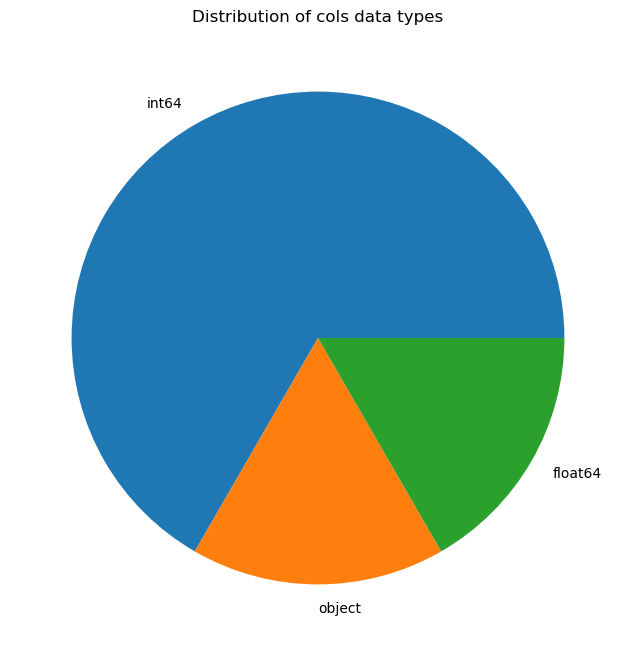

In [4]:
#Your code here
missing=data.isnull().sum()
print("Missing values per column")
print(missing)

datatypes=data.dtypes.value_counts()
print("Count of Cols per datatype")
print(datatypes)

plt.figure(figsize=(8,8))
plt.pie(datatypes.values,labels=datatypes.index)
plt.title('Distribution of cols data types')
plt.show()


<span style="color: purple; font-size: 20px;">**Task 1.2:**</span> In this task, you are required to implement a custom **MyOneHotEncoder** class that performs one-hot encoding on categorical variables in the dataset. The class could include the following methods:

-  **fit:** This method identifies the unique values for each categorical column and stores them for later use. It takes in the dataframe and a list of categorical columns.

-  **transform:** This method performs the actual one-hot encoding on the dataframe. It converts each categorical column into multiple binary columns, where each new column represents one category of the original column. If a column has only two categories, it will be encoded into a single binary column.

-  **fit_transform:** This method combines fit and transform into a single step for convenience, encoding the categorical columns in the dataset.


**Note:** Be sure to apply the class to the categorical features in your data as well


**[5 Marks]**

In [7]:
class MyOneHotEncoder:
    def __init__(self):
        self.unique_vals={}
    
    def fit(self,df,cat_colums):
        for col in cat_colums:
            self.unique_vals[col]=df[col].unique()
        return self

    def transform(self,df):
        #df==dataframe
        encoded_df=df.copy()

        for col,unique_vals in self.unique_vals.items():
            for val in unique_vals:
                new_col= f"{col}_{val}"
                encoded_df[new_col] = (encoded_df[col] == val).astype(int)
            encoded_df.drop(col,axis=1,inplace=True)
        return encoded_df

    def fit_transform(self,df,cat_columns):
        return self.fit(df,cat_columns).transform(df)

    
encoder= MyOneHotEncoder()
cat_cols=[col for col in data.columns if data[col].dtype == 'object']
encoded_df = encoder.fit_transform(data, cat_cols)

<span style="color: purple; font-size: 20px;">**Task 1.3:**</span> In this task, you are required to implement a custom class, MyStandardScaler, to standardize the data (z-score, min/max depending on the data).

You are also required to define a global function for computing the mean squared error between two np arrays.

**Note:** Do not apply the normalisation or the MSE func to the data yet


**[3 Marks]**


In [287]:
#Your code here
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [45]:
#Your code here
class MyStandardScaler:
    def __init__(self,method='z-score'):
        self.method=method
        self.params={}
    
    def fit(self,X):
        self.params['mean'] = np.mean(X,axis=0)
        self.params['std'] = np.std(X,axis=0)
    
    def transform(self,X):
        return (X - self.params['mean'])/self.params['std']
    
    # def fitAndTransform(self,X):
    #     return self.fit(X).transform(X)

<span style="color: green; font-size: 20px;">**Question 1a:**</span> Choice of Scaler class (z-score, min/max)? Justify your choice (you can give justification in the form of a plot as well)

**[2 Mark]**


**Answer:**

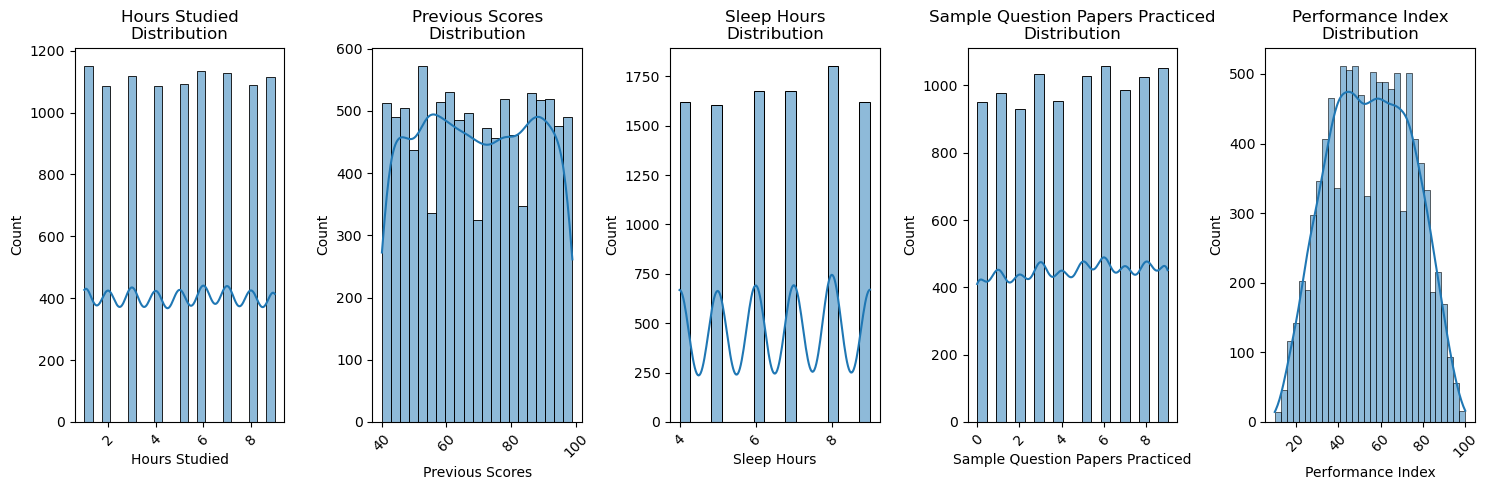

In [9]:

# import seaborn as sns

# numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 
#                  'Sample Question Papers Practiced', 'Performance Index']

# plt.figure(figsize=(15, 5))
# for i, col in enumerate(numerical_cols, 1):
#     plt.subplot(1, 5, i)
#     sns.histplot(data[col], kde=True)
#     plt.title(f'{col}\nDistribution')
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

---

<span style="font-size: 28px;">**Linear Regression Using Gradient Descent**</span>



In this task, you will implement **linear regression** using **gradient descent**, an iterative optimization algorithm used to minimize the error between predicted and actual values. Instead of computing a direct closed-form solution, you will iteratively adjust the model parameters to minimize the loss function.  

### **Algorithmic Basis**  

Linear regression models the relationship between input features $X$ and target values $y$ using the equation:  

$$
y = W_0 + W_1 X_1 + W_2 X_2 + \dots + W_n X_n
$$  

where $W$ represents the model parameters (weights). The goal is to find the optimal values of $W$ that minimize the **Mean Squared Error (MSE)** loss function:  

$$
\text{Loss} = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$  

To achieve this, you will update the model parameters iteratively using **gradient descent**, which adjusts $W$ in the direction that reduces the loss. The update rule for gradient descent is:  

$$
W := W - \alpha \frac{1}{m} X^T (XW - y)
$$  

where:  
- $\alpha$ is the **learning rate**, controlling the step size,  
- $m$ is the number of training samples,  
- $X^T$ is the transposed feature matrix,  
- $(XW - y)$ represents the prediction error.  

You will also track the loss at each iteration to visualize how the model improves over time. 


<span style="color: purple; font-size: 20px;">**Task 1.4:**</span> Implement a **LinearRegression** class that performs linear regression using gradient descent. 
-  This class should be generalizable, capable of handling both univariate and multivariate regression seamlessly.
-  Ensure that the implementation is **fully vectorized to optimize performance**. This means computations (e.g., weight updates) should be handled using matrix operations, avoiding explicit loops wherever possible.



**Note:** You might find it helpful to add a function for plotting the training loss **within** your LR class

**[5 Marks]**


In [ ]:
# Your code here
class LinearRegression:
    def __init__(self, lr=0.01, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias=None
        self.loss = []
        
    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]
    
    def fit(self, X, y):
        X = self.add_bias(np.array(X))
        y = np.array(y).reshape(-1, 1)
        
        self.weights = np.zeros((X.shape[1], 1))
        m = X.shape[0]  # num-samples
        
        # GD
        for i in range(self.n_iterations):
            #Forward
            #@-matrix * operator
            y_pred = X @ self.weights
            
            #Loss-MSE
            loss = np.mean((y_pred - y) ** 2)
            self.loss.append(loss)
    
            gradients = (2/m) * (X.T @ (y_pred - y))
   
            self.weights -= self.learning_rate * gradients
            
        return self
    
    def predict(self, X):
        X = self.add_bias(np.array(X))
        return X @ self.weights
    
    def plot_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss)
        plt.title('Training Loss Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('MSE')
        plt.grid(True)
        plt.show()


<span style="font-size: 20px;">**a) Univariate Regression**</span>


**Feature Selection**


<span style="color: purple; font-size: 20px;">**Task 1.5:**</span> Visualize the correlations between features and the target variable to understand their relationships.

-  Compute the correlation of each feature with the target variable.
-  Create a bar plot to display the absolute correlations of each feature with the target variable
-  Generate a heatmap of the correlation matrix to visualize the pairwise correlations between all features and the target variable

**Note:** Select the **best performing feature** and use that in the tasks ahead.

**[3 Marks]**

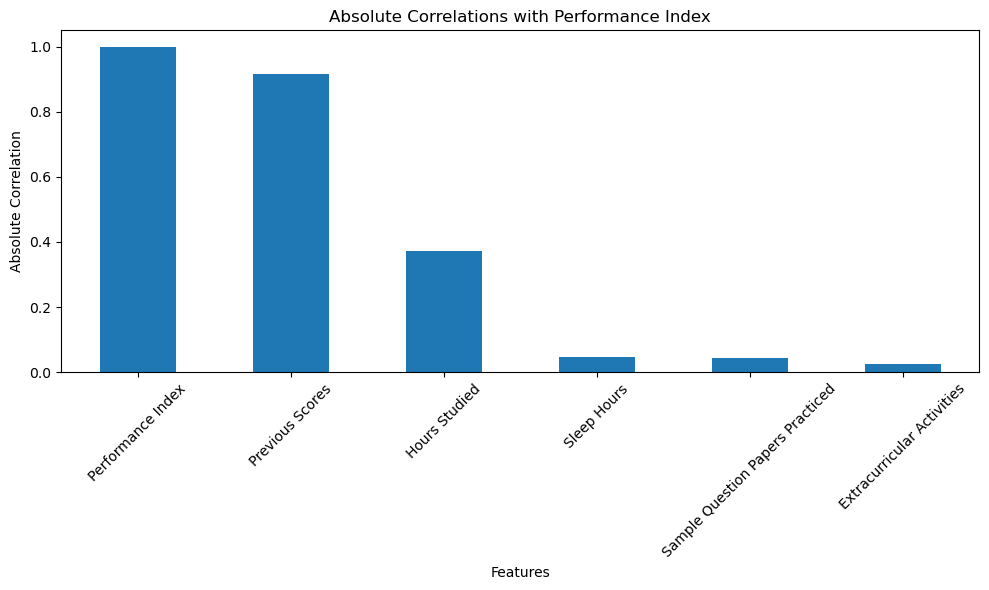


Correlations with Performance Index:
Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64


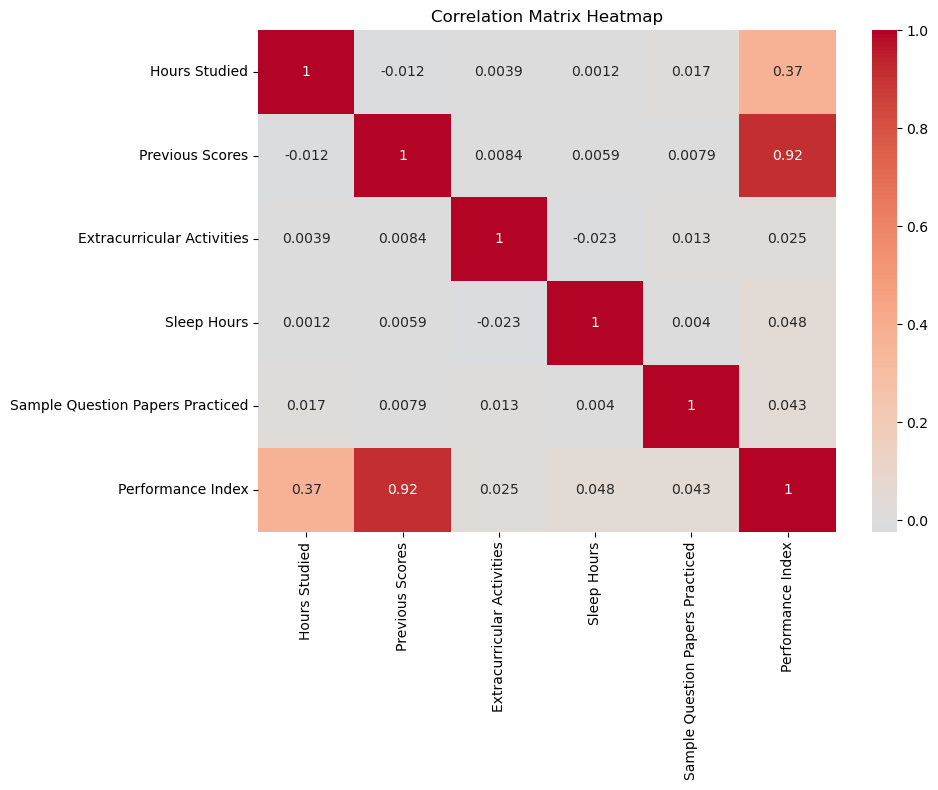


Best performing feature: Previous Scores
Correlation with Performance Index: 0.915


In [ ]:
numeric_data = data.copy()
numeric_data['Extracurricular Activities'] = numeric_data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

correlations = numeric_data.corr()['Performance Index'].sort_values(ascending=False)
abs_correlations = correlations.abs()

plt.figure(figsize=(10, 6))
abs_correlations.plot(kind='bar')
plt.title('Absolute Correlations with Performance Index')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nCorrelations with Performance Index:")
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

best_feature = abs_correlations.drop('Performance Index').idxmax()
print(f"\nBest performing feature: {best_feature}")
print(f"Correlation with Performance Index: {correlations[best_feature]:.3f}")

<span style="color: green; font-size: 20px;">**Question 1b:**</span> What would a negative correlation indicate between the feature and the target variable?  

**[2 Marks]**


**Answer:**
it would indicate an inverse relationship bw a feature and a target variable

<span style="color: green; font-size: 20px;">**Question 1c:**</span> What does it mean when the correlation value is close to zero between a feature and the target variable?

**[2 Marks]**


**Answer:**
it would indicate that there is almost no linear relationship b/w feature and target-var,there might be a non linear relationship isntead


<span style="color: green; font-size: 20px;">**Question 1d:**</span> How can the correlation coefficient help in identifying important features for prediction models? What are the limitations of using only correlation to select features?

**[2 Marks]**


**Answer:**
Benefits: provides a way to identify important predictors, identify redundant features and simple to compute                                                  
Limitations: Only for linear relationships,sensitive to outliers

<span style="color: purple; font-size: 20px;">**Task 1.6:**</span> In this part, extract the selected feature and target variable from the dataset. Split the data into training and testing sets (80-20 split). Use the custom MyStandardScaler to standardize both the training and testing data (Hint: be mindful about which splits of your data you are scaling)


[train_test_split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

**[2 Marks]**


In [ ]:
#Your code here
X= data[best_feature].values.reshape(-1,1)
y= data['Performance Index'].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


scaler = MyStandardScaler()
scaler.fit(X_train)

scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

KeyError: 'Previous Scores'

<span style="color: purple; font-size: 20px;">**Task 1.7:**</span> In this task, you need to follow these steps:

-  Initialize the LinearRegression model with appropriate hyperparameters.
-  Fit the model, then use it to make predictions on the standardized test data.
-  Calculate the Mean Squared Error (MSE) between the predicted and actual values.
-  Plot the loss function to visualize the model’s convergence during training.
-  Visualize the performance of the model by plotting its predictions against the actual data for both training and test sets. Ensure the plots include appropriate labels, titles, legends, and a grid for clear interpretation.

**[4 Marks]**


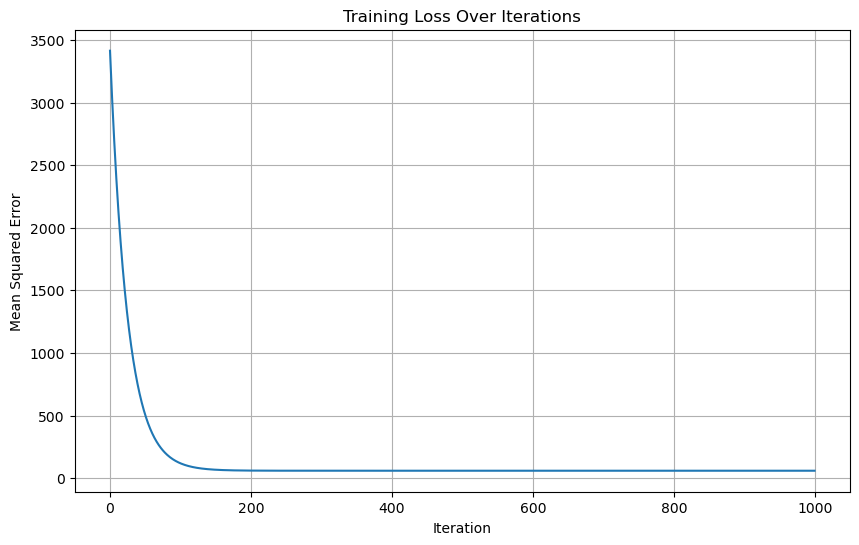

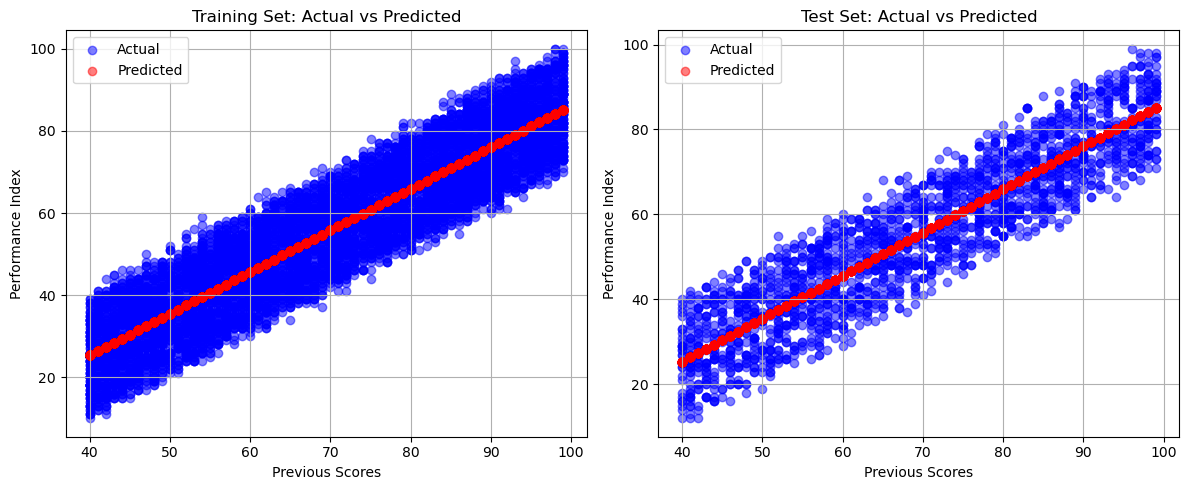

In [ ]:
#Your code here

scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

model= LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(scaled_X_train,y_train)

#pred
y_train_pred=model.predict(scaled_X_train)
y_test_pred=model.predict(scaled_X_test)
#mse
tain_mse=np.mean((y_train - y_train_pred)**2)
test_mse=np.mean((y_test - y_test_pred)**2)


model.plot_loss()

#train
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_train, y_train_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel(best_feature)
plt.ylabel('Performance Index')
plt.title('Training Set: Actual vs Predicted')
plt.legend()
plt.grid(True)

#test
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_test_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel(best_feature)
plt.ylabel('Performance Index')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



<span style="color: purple; font-size: 20px;">**Task 1.8:**</span>

-  Print the learned intercept (bias) parameter of the univariate regression model.
-  Print the learned gradient (weight) parameter associated with the selected feature used in the regression model.

**[1 Mark]**


In [21]:
#Your code here
print(f"Bias:{model.weights[0][0]}")
print(f"Weights for Previous scores: {model.weights[1][0]}")

Bias:55.16899990715237
Weights for Previous scores: 17.614475192252584


<span style="font-size: 20px;">**b) Multivariate Regression**</span>


<span style="color: purple; font-size: 20px;">**Task 1.9:**</span> While univariate regression focuses on a single feature to predict the target, multivariate regression involves multiple features to predict the target variable. You will use similar steps as univariate regression, but here you need to handle multiple input features and ensure they are properly scaled before fitting the model.

-  Define the features and target variable (y) from the dataset.
-  Split the dataset into training and testing sets using train_test_split, with an 80-20 split for training and testing data.
-  Standardize using the MyStandardScaler class you implemented earlier. 

**[3 Marks]**


In [23]:
#Your code here
X = encoded_df.drop('Performance Index', axis=1).values 
y = encoded_df['Performance Index'].values.reshape(-1, 1)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


scaler=MyStandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)
scaled_y_train=scaler.transform(y_train)
scaled_y_test=scaler.transform(y_test)



<span style="color: purple; font-size: 20px;">**Task 1.10:**</span> For this part, you'll implement and train a multivariate linear regression model. 

-  Fit the model.

-  Make predictions on the test data and evaluate the model's performance using the Mean Squared Error (MSE). 

-  Visualize the loss during training to understand how the model converged over the epochs.

**[3 Marks]**


Mean Squared Error on test set: 4.0826


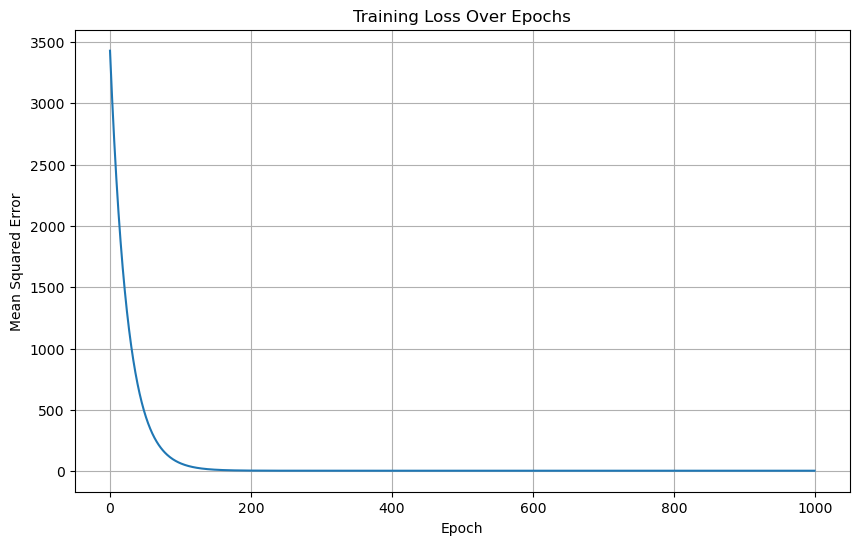

In [25]:
#Your code here

class MultiVariateRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            
            loss = np.mean((y_pred - y) ** 2)
            self.loss.append(loss)
            
            dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
            db = (2/n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

model = MultiVariateRegression(learning_rate=0.01, epochs=1000)
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)

mse = np.mean((y_test - y_pred) ** 2)
print(f"MSE OF TEST: {}")

plt.figure(figsize=(10, 6))
plt.plot(model.loss)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

<span style="color: purple; font-size: 20px;">**Task 1.11:**</span>
-  Print the learned bias term (intercept) parameter of the multivariate regression model.
-  Print the learned gradients (weights) associated with each feature used in the multivariate regression model.

**[1 Mark]**


In [28]:
#Your code here

print("Bias:", model.bias)

feature_names = encoded_df.drop('Performance Index', axis=1).columns

print("\nFeature Weights:")
for feature_name, weight in zip(feature_names, model.weights.flatten()):
    print(f"{feature_name}: {weight}")

Bias (intercept): 55.31149990691255

Feature Weights:
Hours Studied: 7.4013
Previous Scores: 17.6373
Sleep Hours: 0.8100
Sample Question Papers Practiced: 0.5488
Extracurricular Activities_Yes: 0.1521
Extracurricular Activities_No: -0.1521


---

---

## **Part 2:** Stock Price Prediction: Polynomial Regression Using Time-Series Data 📈📈 (80 Marks)


![Alt text](2.jpg)

This part of your assignment focuses on processing time-series data and building simple polynomial regression models.
You shall also be reviewing and analysing some of the theoretical implications of your findings.

---

<span style="color: red; font-size: 24px;">The Problem at Hand:</span>


**Intellinetics**' stock prices have shown fluctuations over time, and your task is to analyze these trends using historical data. In this assignment, you'll work with time-series stock data, focusing on preprocessing and extracting meaningful patterns. You'll apply polynomial regression models to capture the underlying trends and predict future stock prices. By experimenting with different polynomial degrees and optimization techniques, you'll evaluate how well these models fit the data and assess their predictive accuracy.

---

**Importing Required Libraries**


You are not allowed to import any other libraries except the ones provided below (Consult the TA's if there is any confusion in this regard):

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load and Inspect the Dataset**

Import your .csv file here

In [30]:
#Your code here
data=pd.read_csv('INLX.csv')

**Preprocessing**

<span style="color: purple; font-size: 20px;">**Task 2.1:**</span> Preprocess the stock price dataset to prepare it for analysis.

After preprocessing, the dataset should:

-  Have numeric values for relevant columns
-  Be sorted chronologically by date.
-  Include a new column representing time in days since the earliest date.

Display the processed dataset showing columns such as Date, Time, and Close/Last.

**[2 Marks]**


In [140]:
#Your code here
def preprocess_stock_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    
    df = df.sort_values('Date')
    #remove $ to read the data correctly not super imp though
    df['Close/Last'] = df['Close/Last'].str.replace('$','').astype(float)

    earliest_date = df['Date'].min()
    df['Time'] = (df['Date'] - earliest_date).dt.days
    columns = ['Date','Time' ,'Close/Last']
    df = df[columns]
    
    return df

processed = preprocess_stock_data(data)

print("\nOnly few row of processed dataset:")
print(processed.head())



Only few row of processed dataset:
        Date  Time  Close/Last
0 2019-11-08     0        5.03
1 2019-11-09     1        4.90
2 2019-11-10     2        5.47
3 2019-11-11     3        5.94
4 2019-11-12     4        6.10


**Feature Selection and Splitting the Dataset**

<span style="color: purple; font-size: 20px;">**Task 2.2:**</span> Select the features (time) and target variable (closing price) and then split the dataset into training and testing sets with an 80-20 ratio, ensuring that earlier data is used for training and later data for testing. Finally, print the number of samples in each set to confirm the split.

**Note:** You cannot use sklearn's test-train-split method for this. You need to perform a **sequential split** on the dataset to preserve the time order. 

**[3 Marks]**


In [64]:
#Your code here

X = processed[['Time']]
y = processed['Close/Last']

split_id = int(len(processed) * 0.8)

X_train2, X_test2 = X[:split_id], X[split_id:]
y_train2, y_test2 = y[:split_id], y[split_id:]

print("Training set size:", len(X_train2))
print("Testing set size:", len(X_test2))

# print("X-train:", X_train.head())
# print("y-train:", y_train.head())




Training set size: 1530
Testing set size: 383


<span style="color: purple; font-size: 20px;">**Task 2.3:**</span> 

-  Conduct standardization of your data using your custom scaler class from the previous part (if required)

-  Visualize the distribution of training and test data points to understand how they are split across the entire dataset. Plot a scatter plot with training data points in blue and test data points in red, including labels, a title, and grid lines.

**[2 Marks]**


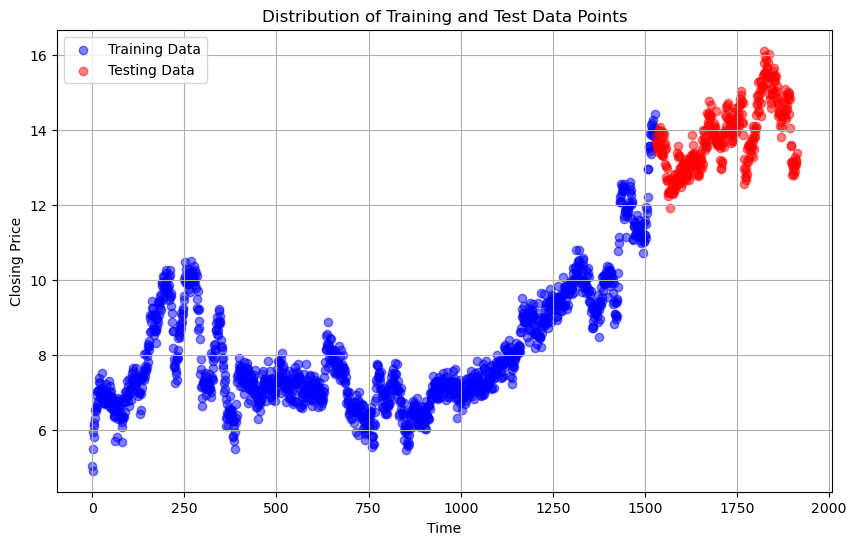

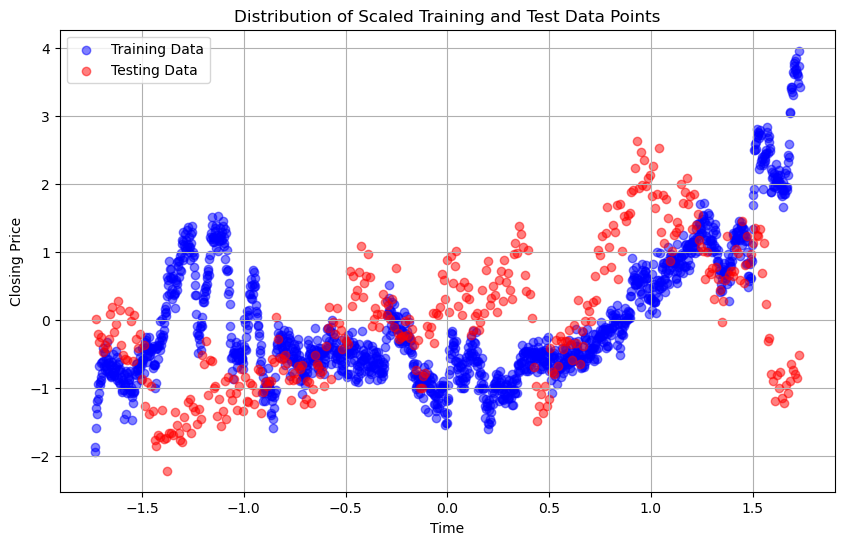

In [66]:
#Your code here
scaler=MyStandardScaler()
scaler.fit(X_train2)
scale_X_train2=scaler.transform(X_train2)

scaler.fit(X_test2)
scale_X_test2=scaler.transform(X_test2)

scaler.fit(y_train2)
scale_y_train2=scaler.transform(y_train2)

scaler.fit(y_test2)
scale_y_test2=scaler.transform(y_test2)

plt.figure(figsize=(10, 6))
plt.scatter(X_train2, y_train2, color='blue', label='Training Data', alpha=0.5)
plt.scatter(X_test2, y_test2, color='red', label='Testing Data', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Distribution of Training and Test Data Points')
plt.grid(True)
plt.legend()
plt.show()


#just for my sake
plt.figure(figsize=(10, 6))
plt.scatter(scale_X_train2, scale_y_train2, color='blue', label='Training Data', alpha=0.5)
plt.scatter(scale_X_test2, scale_y_test2, color='red', label='Testing Data', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Distribution of Scaled Training and Test Data Points')
plt.grid(True)
plt.legend()
plt.show()



**Simple Linear Regression using your class from the first part**

<span style="color: purple; font-size: 20px;">**Task 2.4:**</span> Lets first train a simple regression model to predict the closing price based on time. Compute and report the Mean Squared Error (MSE) to assess the model’s performance. Finally, visualize the model's predictions against the actual target values to analyze its fit.


This will help you get a gist of the task at hand. You are allowed to use your class from the first part for this.

**[2 Marks]**

Mean Squared Error:  191.85821005747763


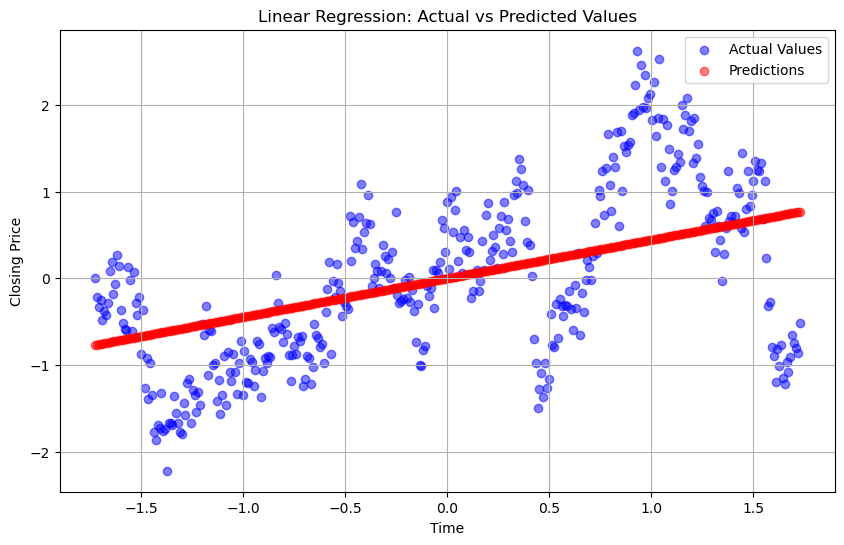

In [ ]:
linear_model = LinearRegression(learning_rate=0.001,n_iterations=1000)
#Your code here

linear_model.fit(scale_X_train2.values, scale_y_train2.values)
y_pred = linear_model.predict(scale_X_test2.values)

mse = np.mean((y_test2.values.reshape(-1, 1) - y_pred) ** 2)
print("MSE: ", mse)

plt.figure(figsize=(10, 6))
plt.scatter(scale_X_test2, scale_y_test2, color='blue', label='Actual Values', alpha=0.5)
plt.scatter(scale_X_test2, y_pred, color='red', label='Predictions', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.grid(True)
plt.legend()
plt.show()




<span style="color: green; font-size: 20px;">**Question 2a:**</span> What are **two** limitations of using linear regression for tasks like stock price prediction, and what are the underlying reasons behind these limitations?

**[2 Marks]**


Answer:It assumes linearity which for stock price is wrong and it doesnt account for time-series data trends 

<span style="font-size: 28px;">**Polynomial Regression**</span>




Polynomial regression extends linear regression by introducing higher-degree terms (powers of the input variables). Instead of fitting a straight line, polynomial regression fits a curve to the data, allowing for the capture of more complex relationships. By using polynomial features, the model can adjust to this complexity, often leading to a more accurate understanding of underlying trends.

### Algorithmic Basis

In polynomial regression, the predictor variable $X$ is raised to higher powers. In its simplest form, a linear regression model predicts the dependent variable $y$ as a weighted sum of the input features:

$$
y = W_0 + W_1 X
$$

Where $W_0$ is the intercept and $W_1$ is the coefficient of the feature $X$.

In polynomial regression, we extend this idea by adding higher-order terms of the feature $X$. For a polynomial of degree $d$, the model becomes:

$$
y = W_0 + W_1 X + W_2 X^2 + W_3 X^3 + \dots + W_d X^d
$$

Here, $X^2, X^3, \dots, X^d$ represent higher powers of the input variable, and the coefficients $W_1, W_2, \dots, W_d$ are learned during the training process.

**Note:**

A key aspect of this technique is converting the input feature $X$ into polynomial features up to the desired degree $d$. For example, if 

$$
X = [x_1, x_2, x_3]
$$

and the degree is 2, the transformed feature matrix will include 

$$
X = [x_1, x_1^2, x_2, x_2^2, x_3, x_3^2]
$$


---
### Polynomial Regression Using the Least Squares Method  

In this task, you will implement polynomial regression using the least squares approach, also referred to as the pseudoinverse, analytical, or closed-form solution. These terms will be used interchangeably throughout the task.  

### Algorithmic Basis  

The least squares method provides a direct solution to the problem of finding the optimal weights for polynomial regression by minimizing the sum of squared errors. Given a dataset with input features $X$ and corresponding target values $y$, the polynomial regression model extends linear regression by incorporating higher-order terms of $X$.  

For a polynomial of degree $d$, the model is represented as:  

$$
y = W_0 + W_1 X + W_2 X^2 + \dots + W_d X^d
$$  

This requires transforming the input feature $X$ into a polynomial feature matrix. The closed-form solution for estimating the weight vector $W$ is given by:  

$$
W = (X^T X)^{-1} X^T y
$$  

where:  
- $X$ is the transformed feature matrix including polynomial terms,  
- $X^T$ is its transpose,  
- $(X^T X)^{-1}$ is the inverse of the square matrix,  
- and $y$ is the target variable.  

Using this method, we obtain the optimal weight vector in a single computation, avoiding iterative updates as seen in gradient-based optimization methods.  

---

<span style="color: purple; font-size: 20px;">**Task 2.5:**</span> You are required to implement a polynomial regression class using the least squares method. Your class should be capable of: 

- Handling polynomial transformations of input data,  
- Computing the optimal weights using the closed-form solution,  
- Making predictions based on the learned weights.  

**[6 Marks]**



In [88]:
#Your code here
class PolynomialRegressionLS:
    def __init__(self, degree):
        self.degree = degree
        self.weights = None
        
    def transform_features(self, X):
        X=np.array(X)
        n_samples = len(X)
        X_py = np.ones((n_samples, self.degree + 1))
        for i in range(1, self.degree + 1):
            X_py[:, i] = X.ravel() ** i
        return X_py
    
    def fit(self, X, y):
        X_py = self.transform_features(X)
        X_T = X_py.T
        self.weights = np.linalg.inv(X_T.dot(X_py)).dot(X_T).dot(y)# w = (X^T X)^(-1) X^T y
        
    def predict(self, X):
        X_py = self.transform_features(X)
        return X_py.dot(self.weights)

<span style="color: purple; font-size: 20px;">**Task 2.6:**</span> You are required to train a custom polynomial regression model using the class you made above. Be sure to do the following:

-  Implement and train a polynomial regression model using the Least Squares method.
-  Set the degree of the polynomial and fit the model to the training data.
-  Output the model's coefficients after training.
-  Predict the target values using the test data and compute the Mean Squared Error (MSE).
-  Plot the actual vs predicted values on a scatter plot. Label the plot appropriately with axes titles and a legend.

**[4 Marks]**




MSE: 36.0676610348782


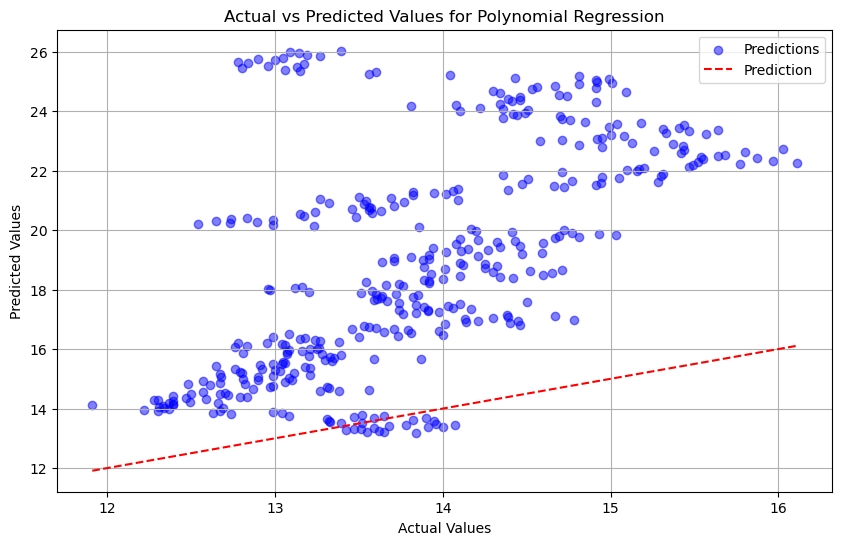

In [134]:
#Your code here
# Set polynomial degree
degree = 3

model = PolynomialRegressionLS(degree)
model.fit(X_train2, y_train2)
y_pred = model.predict(X_test2)
mse = np.mean((y_test - y_pred) ** 2)
print(f"\nMSE: {mse}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


---


<span style="color: purple; font-size: 20px;">**Task 2.7:**</span> Now, implement a polynomial regression model using an iterative approach (**PolynomialRegressionIter**) with gradient descent. Be sure to do the following:

-  The class should take input parameters for the polynomial degree, learning rate, and number of iterations.

-  The model should iteratively update the weights to minimize the loss function, which measures the error between the predicted and actual values.

-  Implement a method to transform the input features into polynomial terms, including the bias term and higher-degree terms up to the specified polynomial degree. This transformation will be used for both training and prediction.

-  The loss during each iteration should be tracked to monitor the progress of the optimization process. You'll need to use this loss track for later tasks

-  The model should be able to make predictions based on the learned weights after training.


**Note:** Make sure your graphs' axes are labelled correctly and include legends in your plots wherever required

**[6 Marks]**



In [92]:
class PolynomialRegressionIter:
    def __init__(self, degree, learning_rate=0.01, n_iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.loss = []
    
    def transform_features(self, X):
        X = np.array(X)
        n_samples = len(X)
        X_poly = np.ones((n_samples, self.degree + 1))
        for i in range(1, self.degree + 1):
            X_poly[:, i] = X.ravel() ** i
        return X_poly
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        X_poly = self.transform_features(X)
        n_samples, n_features = X_poly.shape
        self.weights = np.random.randn(n_features, 1)
        
        # gd
        for i in range(self.n_iterations):
            # Forwards
            y_pred = X_poly @ self.weights
            loss = np.mean((y_pred - y) ** 2)
            self.loss.append(loss)
            gradients = (2/n_samples) * X_poly.T @ (y_pred - y)
            self.weights -= self.learning_rate * gradients
    
    def predict(self, X):
        #@-- matrix X
        X_poly = self.transform_features(np.array(X))
        return X_poly @ self.weights

<span style="color: purple; font-size: 20px;">**Task 2.8:**</span> Train a custom polynomial regression model using the class you made above, and your chosen hyperparameters (you can fine-tune these). Also be sur eto do the following:

-  Print the learned weights (coefficients) of the model after training.

-  Plot the loss over iterations to visualize the model's convergence during training. To do this you have to ensure the loss is tracked during the gradient descent process.

-  After training, evaluate the model's performance by calculating the mean squared error and visualizing the predicted vs. actual values using a scatter plot. 

**Note:** Make sure your graphs' axes are labelled correctly and include legends in your plots wherever required

**[5 Marks]**




Learned Model Coefficients:
w0: -0.667546
w1: -0.393236
w2: 0.665177
w3: 0.499474

Training MSE: 0.25220247376136956
Testing MSE: 1.6037194122646696


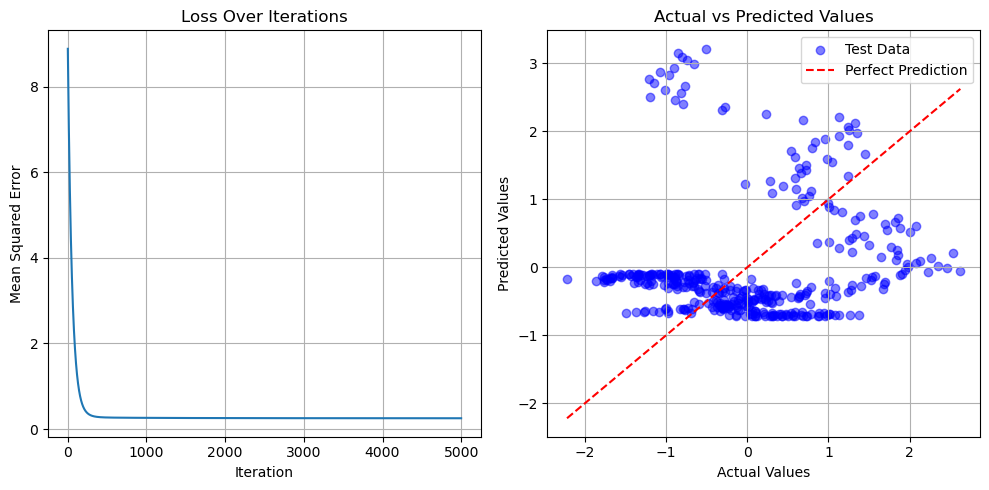

In [96]:
#Your code here
degree = 3  
learning_rate = 0.001  
n_iterations = 5000  

model = PolynomialRegressionIter(degree=degree, learning_rate=learning_rate, n_iterations=n_iterations)
model.fit(scale_X_train2, scale_y_train2)

print("Learned Model Coefficients:")
for i, weight in enumerate(model.weights):
    print(f"w{i}: {weight[0]}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model.loss)
plt.title('Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)

y_train_pred = model.predict(scale_X_train2).flatten()
y_test_pred = model.predict(scale_X_test2).flatten()

# y_train2_np=np.array(y_train2)
# y_test2_np=np.array(y_test2)
train_mse = np.mean((scale_y_train2 - y_train_pred) ** 2)
test_mse = np.mean((scale_y_test2 - y_test_pred) ** 2)
print(f"\nTraining MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

plt.subplot(1, 2, 2)
plt.scatter(scale_y_test2, y_test_pred, color='blue', alpha=0.5, label='Test Data')
plt.plot([scale_y_test2.min(), scale_y_test2.max()], [scale_y_test2.min(), scale_y_test2.max()], 'r--', label='Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<span style="color: green; font-size: 20px;">**Question 2b:**</span> Why do the coefficients and Mean Squared Error (MSE) differ between the Gradient Descent (GD) and Least Squares (LS) methods?

**[2 Marks]**


**Answer:** Since GD uses iterative approach and LS uses other closed form approach causing difference in MSE vals

<span style="color: green; font-size: 20px;">**Question 2c:**</span> If one is free to choose any polynomial degree one wants, can a zero training loss be ever achieved? Provide a sound mathematical justification to support your answer. Also, if your answer is yes, determine what choice of polyonomial degree will guarantee zero loss.

**[3 Marks]**


**Answer:** theoretically yes because a polynomial of n-1 degree for n data points should give zero loss but may cause overfitting


<span style="font-size: 24px;">**Comparitive Analysis**</span>


<span style="color: purple; font-size: 20px;">**Task: 2.9**</span> In this task, you will analyze the performance of Polynomial Regression using your **PolynomialRegressionLS** by varying the degree of the polynomial.

-  Implement the code to train a Polynomial Regression model using your **PolynomialRegressionLS** class with different polynomial degrees.
-  For each polynomial degree, plot the actual vs. predicted stock prices and compute the Mean Squared Error (MSE) on the test data.

**[4 Marks]**



Training MSE: 0.7355566470284574
Testing MSE: 0.6408307031603215


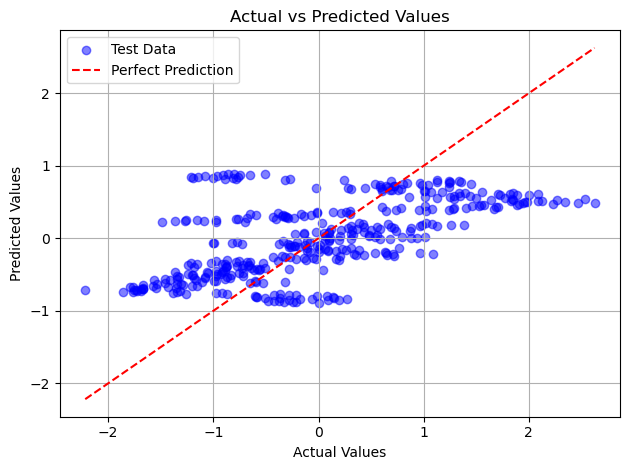


Training MSE: 0.389239396315756
Testing MSE: 1.0866967047522293


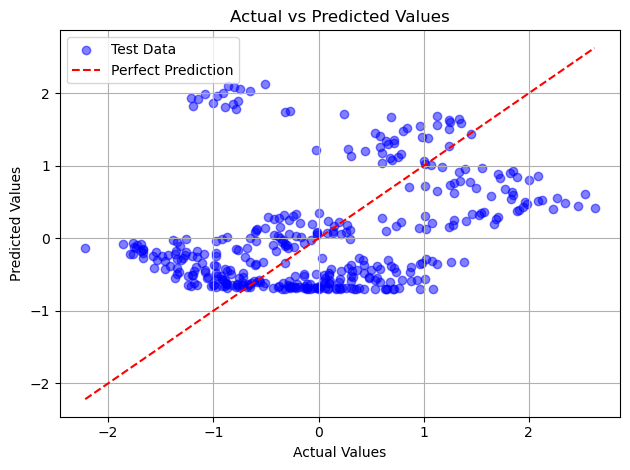


Training MSE: 0.25421667791609365
Testing MSE: 1.5035167087132695


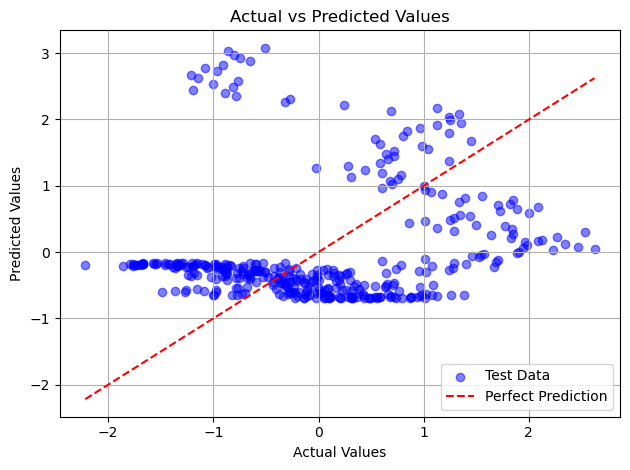


Training MSE: 0.22836413601506053
Testing MSE: 1.4739965051320811


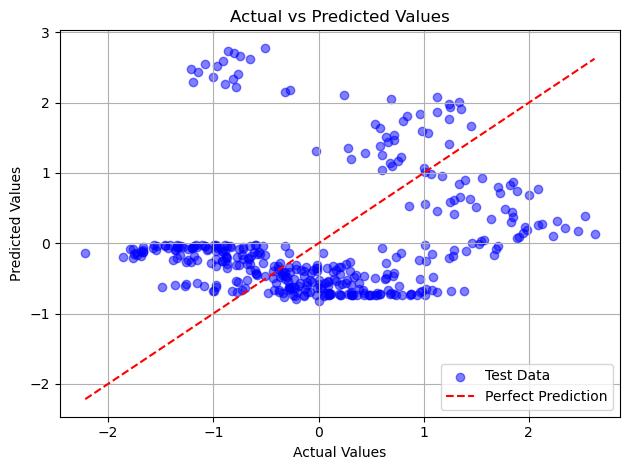


Training MSE: 0.22874272759724637
Testing MSE: 1.566185981656321


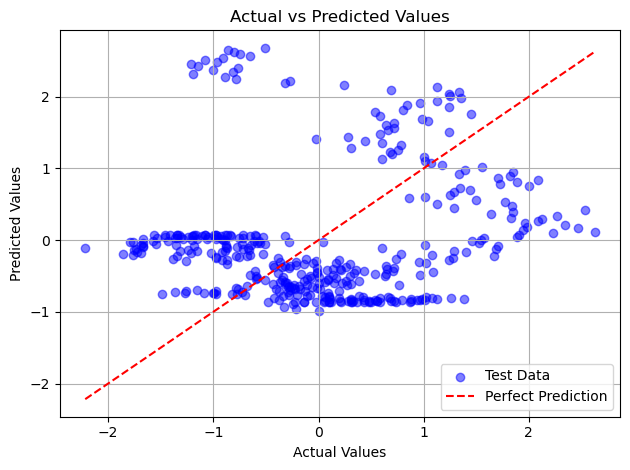

In [121]:
# we have provided parameters for polynomial degrees (but try experimenting with these)
degrees = [1, 2, 3, 4, 5]

#Your code here
for i in degrees:
    learning_rate = 0.001  
    n_iterations = 5000  

    model = PolynomialRegressionIter(degree=i, learning_rate=learning_rate, n_iterations=n_iterations)
    model.fit(scale_X_train2, scale_y_train2)

    y_train_pred = model.predict(scale_X_train2).flatten()
    y_test_pred = model.predict(scale_X_test2).flatten()

    # y_train2_np=np.array(y_train2)
    # y_test2_np=np.array(y_test2)
    train_mse = np.mean((scale_y_train2 - y_train_pred) ** 2)
    test_mse = np.mean((scale_y_test2 - y_test_pred) ** 2)
    print(f"\nTraining MSE: {train_mse}")
    print(f"Testing MSE: {test_mse}")

    plt.plot(2,2)
    plt.scatter(scale_y_test2, y_test_pred, color='blue', alpha=0.5, label='Test Data')
    plt.plot([scale_y_test2.min(), scale_y_test2.max()], [scale_y_test2.min(), scale_y_test2.max()],'r--', label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

<span style="color: purple; font-size: 20px;">**Task 2.10:**</span> Now, using your **PolynomialRegressionIter** class, explore the performance of polynomial regression by varying the degree of the polynomial and the number of iterations used for training. You will need to initialize and train a polynomial regression model using different combinations of polynomial degrees and iteration values.

-  Implement the code to train the polynomial regression model with different degrees.
-  For each combination, plot the actual vs predicted stock prices and compute the Mean Squared Error (MSE) for the test data.
-  Observe how the model behaves as you change the parameters.

**[4 Marks]**


Degree: 1, Iterations: 5000 => Test MSE: 0.6408556962250955


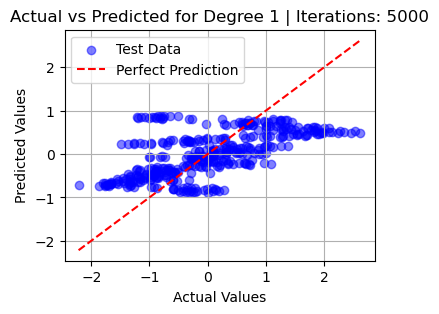

Degree: 2, Iterations: 5000 => Test MSE: 1.1327164495904147


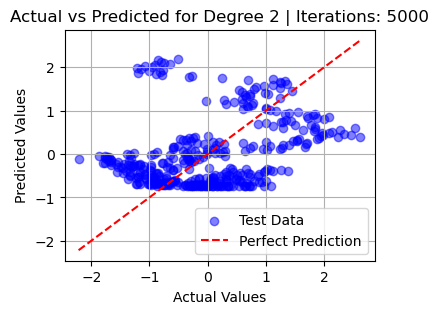

Degree: 3, Iterations: 5000 => Test MSE: 1.3124989347419962


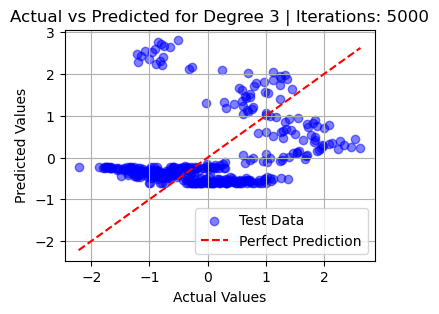

Degree: 4, Iterations: 5000 => Test MSE: 1.3336972110921146


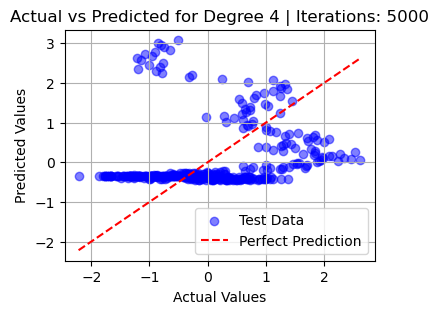

Degree: 5, Iterations: 5000 => Test MSE: 1.5345718112255828


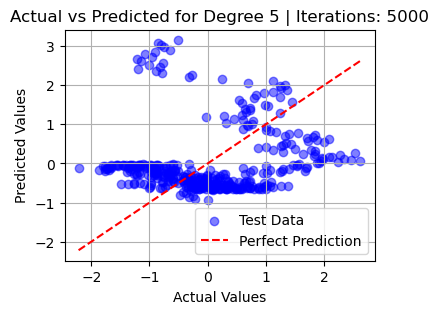

Degree: 1, Iterations: 10000 => Test MSE: 0.640839078928207


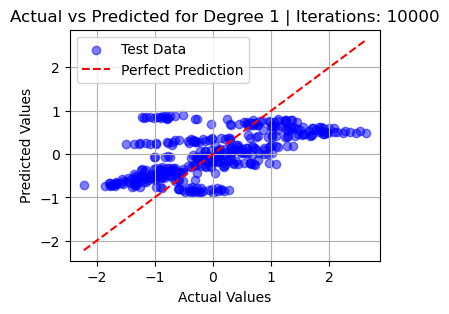

Degree: 2, Iterations: 10000 => Test MSE: 1.1480366055597573


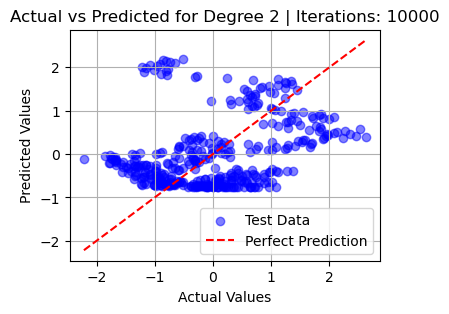

Degree: 3, Iterations: 10000 => Test MSE: 1.5828675992238934


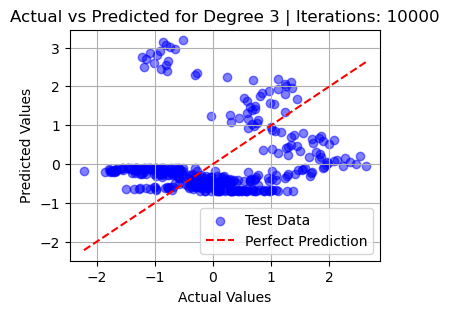

Degree: 4, Iterations: 10000 => Test MSE: 1.4495153978460185


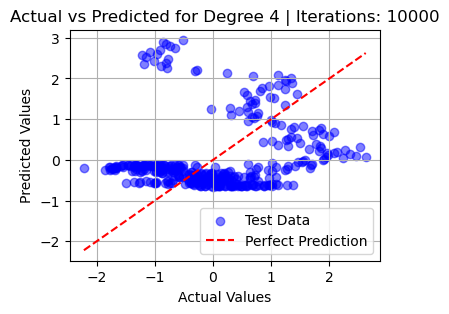

Degree: 5, Iterations: 10000 => Test MSE: 1.7635089936113726


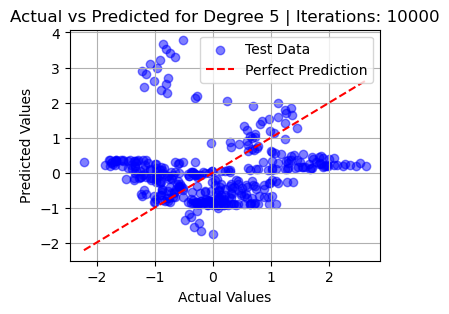

Degree: 1, Iterations: 20000 => Test MSE: 0.6408390789858884


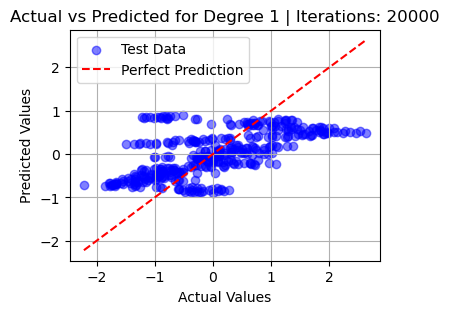

Degree: 2, Iterations: 20000 => Test MSE: 1.146652460537017


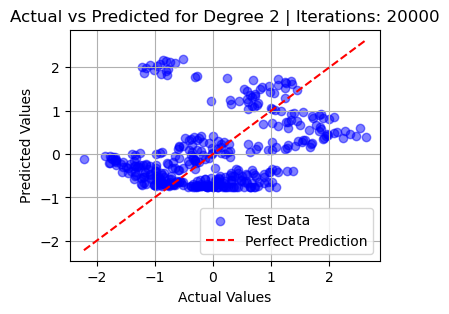

Degree: 3, Iterations: 20000 => Test MSE: 1.553622085697283


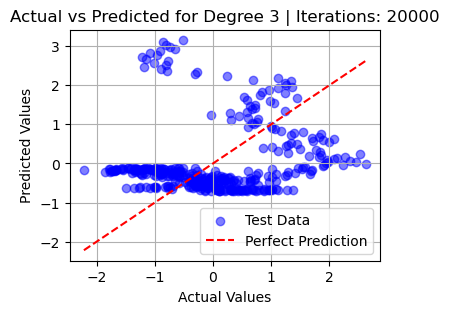

Degree: 4, Iterations: 20000 => Test MSE: 1.557048092880596


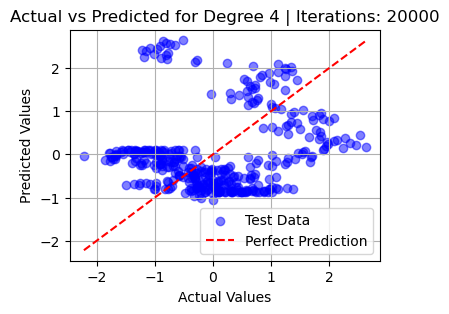

Degree: 5, Iterations: 20000 => Test MSE: 1.675733266885608


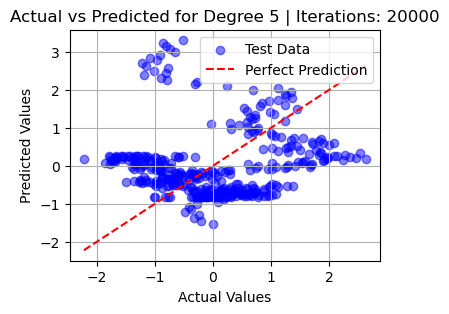

In [ ]:
# we have provided parameters for polynomial degrees and iterations (but try experimenting with these)
degrees = [1, 2, 3, 4, 5]
iteration_settings = [5000, 10000, 20000]
lr=0.001

for i in iteration_settings:
    for degree in degrees:
        model = PolynomialRegressionIter(degree=degree, learning_rate=learning_rate, n_iterations=i)
        model.fit(scale_X_train2, scale_y_train2)
        
        y_test_pred = model.predict(scale_X_test2).flatten()
        
        test_mse = np.mean((scale_y_test2 - y_test_pred) ** 2)
        print(f"Degree: {degree}, Iterations: {i} => Test MSE: {test_mse}")
        
        plt.figure(figsize=(4,3))
        plt.scatter(scale_y_test2, y_test_pred, color='blue', alpha=0.5, label='Test Data')
        plt.plot([scale_y_test2.min(), scale_y_test2.max()], [scale_y_test2.min(), scale_y_test2.max()], 'r--', label='Perfect Prediction')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs Predicted for Degree {degree} | Iterations: {i}')
        plt.legend()
        plt.grid(True)
        plt.show()

#Your code here

<span style="color: green; font-size: 20px;">**Question 2d:**</span> What happens when we increase the polynomial degree or the number of iterations during training? How does this generally affect the model's ability to adapt to unseen data?

**[2 Marks]**


**Answer:** can reduce training error but may lead to overfitting and poorer generalization on unseen data

<span style="font-size: 22px;">**Regularization in Regression**</span>


<span style="color: purple; font-size: 20px;">**Task 2.11:**</span> Explore how regularization impacts a polynomial regression model by implementing Ridge (L2), Lasso (L1), and ElasticNet (L1+L2) techniques. Follow these steps:

-  Transform Data: Use your PolynomialRegression (either LS or Iter) class to generate polynomial features (use degree = 5) for training and testing data.

-  Train Models:

    -  For Ridge, Lasso, and ElasticNet:
        -  Train models with different alpha (regularization strengths). These have been provided to you
        
        -  Compute the MSE on each iteration(for each alpha) and plot predictions against actual values for each model. Display the MSE for each alpha as well

        -  For ElasticNet, experiment with l1_ratio to balance L1 and L2 (observe the changes)

**Note:** You can do this part using **either** your LS class **or** your Iterative class, you are not required to use both.

[ElasticNet Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

[Ridge Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

[Lasso Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

**[6 Marks]**


In [119]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
# you can change these parameters

regularization_strengths = [0.01, 0.1, 1, 5, 10]
poly_degree = 5
poly_reg = PolynomialRegressionIter(degree=poly_degree)

X_train_poly = poly_reg.transform_features(X_train2)
X_test_poly = poly_reg.transform_features(X_test2)



Ridge Regression (L2)
Ridge - Alpha: 0.01, Test MSE: 93.8472


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47689e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


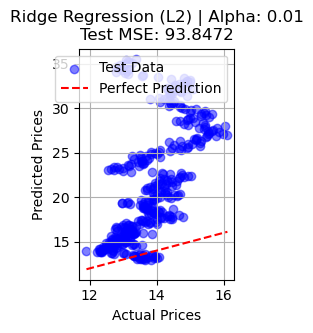

Ridge - Alpha: 0.1, Test MSE: 93.8471


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47689e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


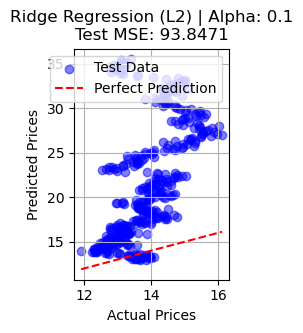

Ridge - Alpha: 1, Test MSE: 93.8462


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47689e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


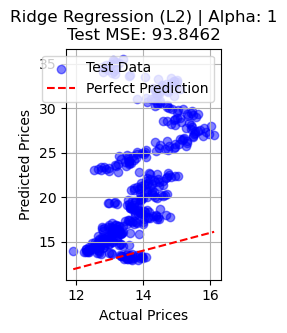

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.38447e-34): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge - Alpha: 5, Test MSE: 93.8424


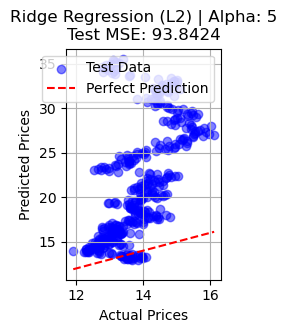

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.47689e-33): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge - Alpha: 10, Test MSE: 93.8376


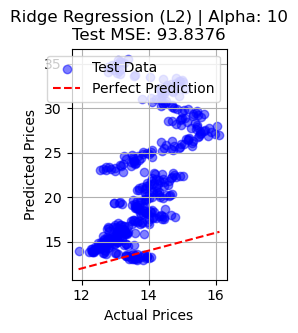

In [135]:
# Ridge Regression
#Your code here
print("Ridge Regression (L2)")
for alpha in regularization_strengths:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train2)
    y_pred = ridge_model.predict(X_test_poly)
    mse = mean_squared_error(y_test2, y_pred)
    print(f"Ridge - Alpha: {alpha}, Test MSE: {mse}")
    
    plt.figure(figsize=(2,3))
    plt.scatter(y_test2, y_pred, color='blue', alpha=0.5, label='Test Data')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', label='Perfect Prediction')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Ridge Regression (L2) | Alpha: {alpha}\nTest MSE: {mse}")
    plt.legend()
    plt.grid(True)
    plt.show()



Lasso Regression (L1)
Lasso - Alpha: 0.01, Test MSE: 0.5220


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.501e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


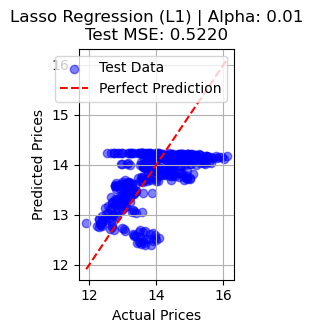

Lasso - Alpha: 0.1, Test MSE: 0.5070


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.520e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


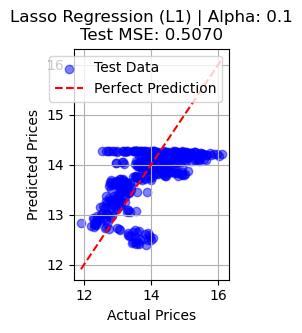

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.700e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


Lasso - Alpha: 1, Test MSE: 0.5262


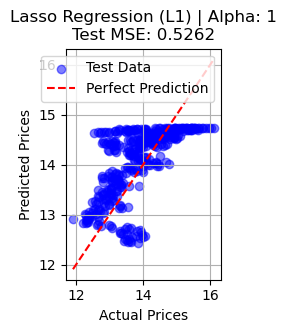

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.256e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


Lasso - Alpha: 5, Test MSE: 4.3388


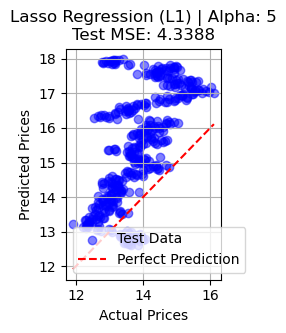

Lasso - Alpha: 10, Test MSE: 16.1434


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.401e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


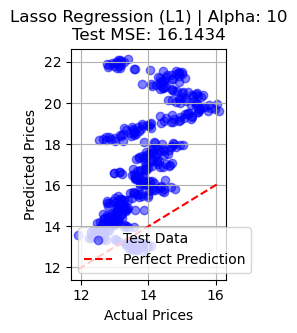

In [136]:
# Lasso Regression
#Your code here
print("\nLasso Regression (L1)")
for alpha in regularization_strengths:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_poly, y_train2)
    y_pred = lasso_model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Lasso - Alpha: {alpha}, Test MSE: {mse}")
    
    plt.figure(figsize=(2,3))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Test Data')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  'r--', label='Perfect Prediction')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Lasso Regression (L1) | Alpha: {alpha}\nTest MSE: {mse}")
    plt.legend()
    plt.grid(True)
    plt.show()

l1_ratios = [0.2, 0.5, 0.8]


ElasticNet Ref (L1+L2)
ElasticNet - Alpha: 0.01, l1_ratio: 0.2, Test MSE: 0.5235


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.499e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


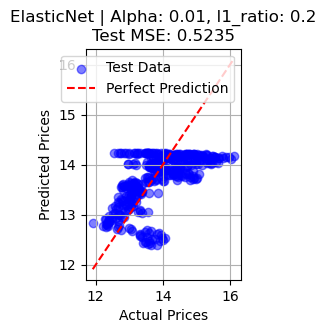

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.500e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 0.01, l1_ratio: 0.5, Test MSE: 0.5230


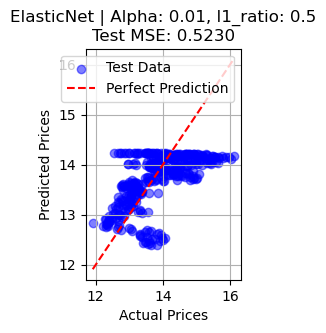

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.501e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 0.01, l1_ratio: 0.8, Test MSE: 0.5224


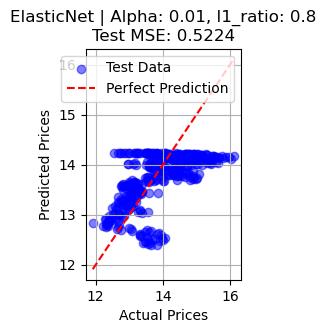

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.503e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 0.1, l1_ratio: 0.2, Test MSE: 0.5201


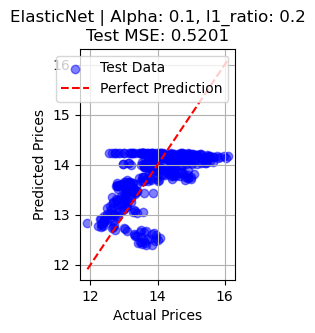

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.510e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 0.1, l1_ratio: 0.5, Test MSE: 0.5149


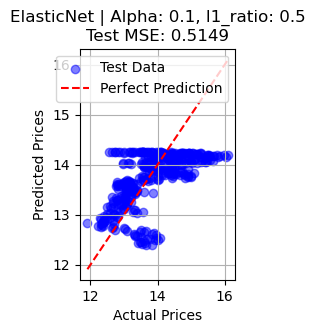

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.516e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 0.1, l1_ratio: 0.8, Test MSE: 0.5101


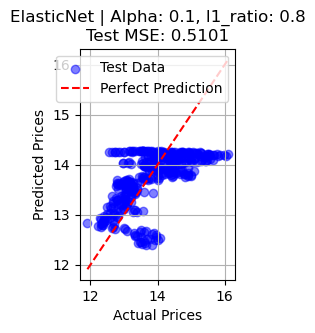

ElasticNet - Alpha: 1, l1_ratio: 0.2, Test MSE: 0.4930


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.542e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


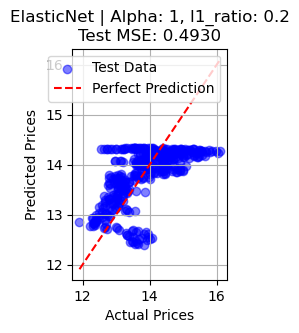

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.603e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 1, l1_ratio: 0.5, Test MSE: 0.4776


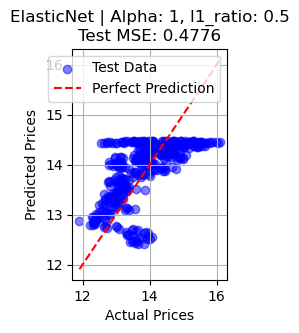

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.662e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 1, l1_ratio: 0.8, Test MSE: 0.4956


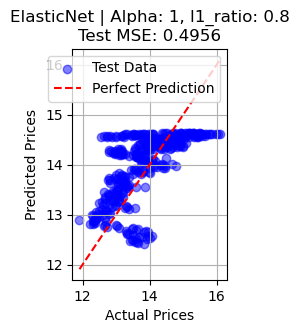

ElasticNet - Alpha: 5, l1_ratio: 0.2, Test MSE: 0.5339


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.705e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


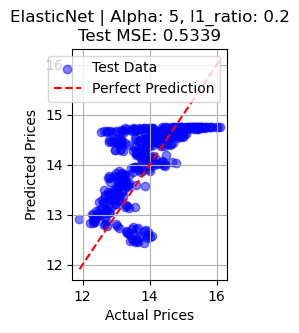

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.958e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 5, l1_ratio: 0.5, Test MSE: 1.2578


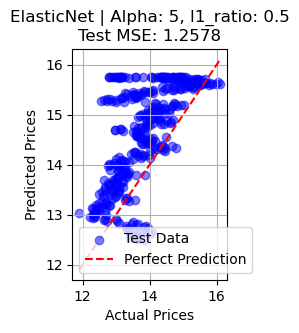

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.155e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 5, l1_ratio: 0.8, Test MSE: 2.8233


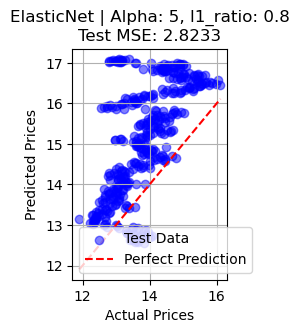

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.884e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 10, l1_ratio: 0.2, Test MSE: 0.9485


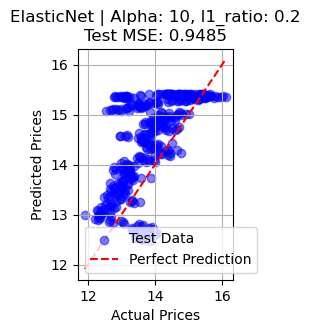

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.257e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 10, l1_ratio: 0.5, Test MSE: 4.3830


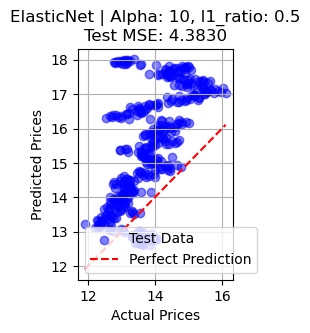

c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.410e+02, tolerance: 3.981e-01
  model = cd_fast.enet_coordinate_descent(


ElasticNet - Alpha: 10, l1_ratio: 0.8, Test MSE: 11.1926


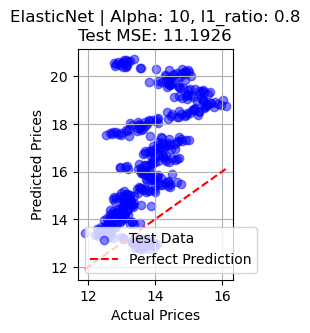

In [137]:
# ElasticNet Regression
print("\nElasticNet Ref (L1+L2)")
for alpha in regularization_strengths:
    for l1_ratio in l1_ratios:
        enet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        enet_model.fit(X_train_poly, y_train2)
        y_pred = enet_model.predict(X_test_poly)
        mse = mean_squared_error(y_test, y_pred)#mse from lib i think scikit
        print(f"ElasticNet - Alpha: {alpha}, l1_ratio: {l1_ratio}, Test MSE: {mse}")
        
        plt.figure(figsize=(2,3))
        plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Test Data')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.title(f"ElasticNet | Alpha: {alpha}, l1_ratio: {l1_ratio}\nTest MSE: {mse}")
        plt.legend()
        plt.grid(True)
        plt.show()

<span style="color: green; font-size: 20px;">**Question 2e:**</span> Why does the Mean Squared Error (MSE) change less sharply with higher regularization strengths in Ridge Regression compared to Lasso Regression, where the MSE changes significantly?

**[3 Marks]**


**Answer:** In L2 the weight coeffs are shrinked gradually whereas in L1 most weights are set to zero causing steep drop

<span style="color: green; font-size: 20px;">**Question 2f:**</span> In what scenarios would ElasticNet be more effective than Lasso or Ridge alone? Provide examples of datasets where this flexibility would be beneficial?

**[3 Marks]**


Answer: It is effective for high dimensional data

<span style="font-size: 24px;">**Bias Variance Tradeoff Analysis🎯**</span>


<span style="color: purple; font-size: 20px;">**Task 2.12:**</span> Using your **PolynomialRegressionIter** class, explore the bias-variance tradeoff in polynomial regression by varying the polynomial degree. Train the model and evaluate performance on training and test data. Note the following:

-  The range of the polynomial degrees that you need to test on have been provided below
- Compute and store the MSE for both training and test sets. **Print both these values for each degree that you iterate over**
- Plot the MSE for training and test sets against polynomial degree.
- Analyze the bias-variance tradeoff by answering the questions that follow

**[4 Marks]**


Iterative Model | Degree: 1 => Train MSE: 0.7356, Test MSE: 0.6409
Iterative Model | Degree: 2 => Train MSE: 0.3869, Test MSE: 1.1470
Iterative Model | Degree: 3 => Train MSE: 0.2855, Test MSE: 1.3267
Iterative Model | Degree: 4 => Train MSE: 0.4931, Test MSE: 1.1995
Iterative Model | Degree: 5 => Train MSE: 0.2568, Test MSE: 1.6504
Iterative Model | Degree: 6 => Train MSE: 0.2121, Test MSE: 1.6566
Iterative Model | Degree: 7 => Train MSE: 0.2148, Test MSE: 1.6124
Iterative Model | Degree: 8 => Train MSE: 0.4088, Test MSE: 1.6669


c:\Users\haxga\anaconda3\envs\myenv\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\haxga\AppData\Local\Temp\ipykernel_25852\1564196493.py:37: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred - y) ** 2)
C:\Users\haxga\AppData\Local\Temp\ipykernel_25852\1564196493.py:41: RuntimeWarning: invalid value encountered in matmul
  gradients = (2/n_samples) * X_poly.T @ (y_pred - y)
C:\Users\haxga\AppData\Local\Temp\ipykernel_25852\1564196493.py:44: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradients


Iterative Model | Degree: 9 => Train MSE: nan, Test MSE: nan


C:\Users\haxga\AppData\Local\Temp\ipykernel_25852\1564196493.py:41: RuntimeWarning: overflow encountered in matmul
  gradients = (2/n_samples) * X_poly.T @ (y_pred - y)


Iterative Model | Degree: 10 => Train MSE: nan, Test MSE: nan
Iterative Model | Degree: 11 => Train MSE: nan, Test MSE: nan


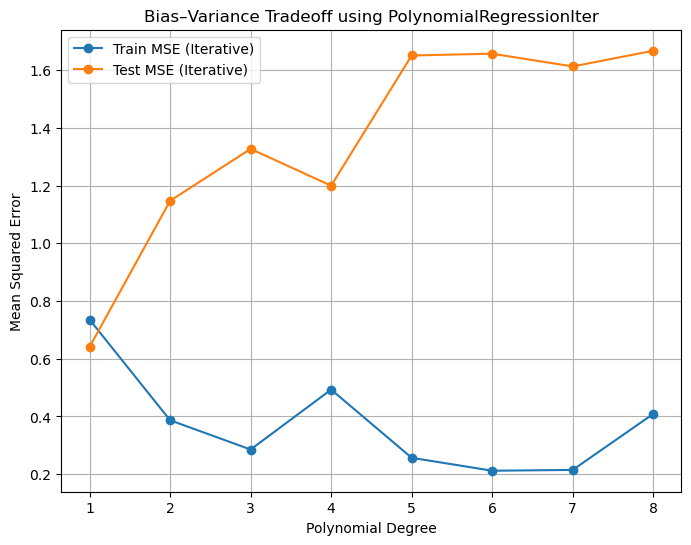

In [ ]:
# We have provided parameters for polynomial degrees (feel free to experiment with them)
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
train_errors = []
test_errors = []

lr = 0.001
n = 5000

for degree in degrees:
    model_iter = PolynomialRegressionIter(degree=degree, learning_rate=lr, n_iterations=n)
    model_iter.fit(scale_X_train2, scale_y_train2)
    
    #flatten-else mse doesnt work, flatten doesnt work on pd data so change to np array
    scale_X_train2_np=np.array(scale_X_train2)
    scale_X_test2_np=np.array(scale_X_test2)

    y_train_pred = model_iter.predict(scale_X_train2).flatten()
    y_test_pred = model_iter.predict(scale_X_test2).flatten()
    
    scale_y_train2_np=np.array(scale_y_train2)
    scale_y_test2_np=np.array(scale_y_test2)

    mse_train = np.mean((scale_y_train2_np.flatten() - y_train_pred) ** 2)
    mse_test = np.mean((scale_y_test2_np.flatten() - y_test_pred) ** 2)
    
    train_errors.append(mse_train)
    test_errors.append(mse_test)
    
    print(f" Degree: {degree} => Train MSE: {mse_train}, Test MSE: {mse_tes}")

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Train MSE')
plt.plot(degrees, test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff using PolynomialRegressionIter")
plt.legend()
plt.grid(True)
plt.show()




<span style="color: purple; font-size: 20px;">**Task 2.13:**</span> Repeat the above instructions in <span style="color: purple; font-size: 20px;">**Task 2.12**</span>, this time using your **PolynomialRegressionLS** class.

**[4 Marks]**


LS Model | Degree: 1 => Train MSE: 0.7356, Test MSE: 0.6408
LS Model | Degree: 2 => Train MSE: 0.3869, Test MSE: 1.1467
LS Model | Degree: 3 => Train MSE: 0.2515, Test MSE: 1.5586
LS Model | Degree: 4 => Train MSE: 0.2199, Test MSE: 1.5578
LS Model | Degree: 5 => Train MSE: 0.2050, Test MSE: 1.6618
LS Model | Degree: 6 => Train MSE: 0.2050, Test MSE: 1.6619
LS Model | Degree: 7 => Train MSE: 0.2000, Test MSE: 1.6444


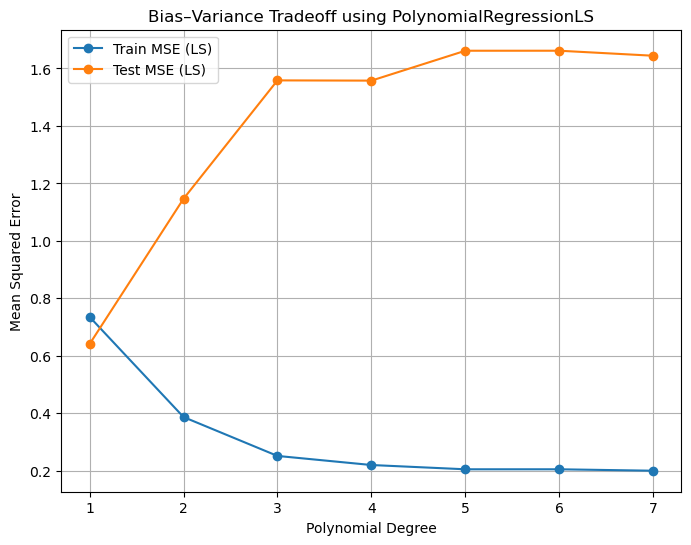

In [ ]:
# We have provided parameters for polynomial degrees (feel free to experiment with them)
degrees = [1, 2, 3, 4, 5, 6, 7]

train_errors = []
test_errors = []


for degree in degrees:
    model_ls = PolynomialRegressionLS(degree=degree)
    model_ls.fit(scale_X_train2, scale_y_train2)
    
    y_train2_pred = model_ls.predict(scale_X_train2_np).flatten()
    y_test2_pred = model_ls.predict(scale_X_test2_np).flatten()
    
    mse_train = np.mean((scale_y_train2_np.flatten() - y_train2_pred) ** 2)
    mse_test = np.mean((scale_y_test2_np.flatten() - y_test2_pred) ** 2)
    
    train_errors.append(mse_train)
    test_errors.append(mse_test)
    
    print(f"Degree: {degree} => Train MSE: {mse_train}, Test MSE: {mse_test}")

plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Train MSE')
plt.plot(degrees, test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff using PolynomialRegressionLS")
plt.legend()
plt.grid(True)
plt.show()



<span style="color: green; font-size: 20px;">**Question 2g:**</span> How and why does the model's performance on the training data change as you increase the complexity of the model? What happens to its performance on the testing data? If so, why? Explain in the context of bias variance tradeoff.

**[3 Marks]**


Answer: for training data the model fits the data more closely lowering the training MSE, but in case of testing data the same trend continues but after a while as we increase degree the model starts to overfit increasing the testing MSE

<span style="color: green; font-size: 20px;">**Question 2h:**</span> If noise in the dataset increases, how would you expect the bias-variance tradeoff to shift? What changes might occur in the error curves?

**[2 Marks]**


Answer: Increase of noise shifts training testing errors up

<span style="color: green; font-size: 20px;">**Question 2i:**</span> If we introduce **L2 regularization** into the polynomial regression model, the loss function becomes:

$$
\text{Loss with L2} = \text{MSE} + \lambda \sum_{j=1}^{p} W_j^2
$$

Where:
- $ \lambda $ is the regularization parameter.
- $ W_j $ represents the model parameters.

Since you have already implemented this, explain how the inclusion of the regularization term would impact the **bias** and **variance** in the model. How would this new function behave when we increase the polynomial degree? (hint: refer to one of your previous tasks)


**[3 Marks]**


Answer:Adding L2 decrease Bias slightly only but it decrease variance alot because it limits the weights from growing alot



<span style="color: green; font-size: 20px;">**Question 2j:**</span> If instead of performing a sequential train-test split the way you did, you had used random sampling via sklearn's **train_test_split** method, how would this have impacted the bias-variance tradeoff? 

How does this affect model generalization, particularly if the data has temporal dependencies? Give two advantages and 1 disadvantage of using each method (hint: one of these methods assumes IID (independent and identically distributed) data)

**Note:** You are **required** to use code/graphs to supplement your answer.

**[5 Marks]**


**Answer:** for sequential the advantage is that ensures use of past data only for training but it would cause the test set to not reflect the training set aswell.
Random-Shuffling: yields a train-test dataset that represents the overall dataset very well,but in case of time-series data it can mix past and future information leading to poor real world generalization

In [ ]:
#Your code here

---